### Edgar Martin Hernandez

### Department of Mining and Materials Engineering

### McGill University

# Introduction to GIS in Python with gpd and Folium

## Data Management

### Import .shp data Provinces

In [163]:
import os
# import conda
import pandas as pd
import numpy as np
import json
from scipy.optimize import curve_fit
from shapely.geometry import MultiPoint, Point
import unidecode

import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colors as colors
from matplotlib.lines import Line2D  # for legend handle


import geopandas as gpd
from shapely.geometry import Point

import folium

# pd.options.display.max_columns = 250
# pd.options.display.max_rows = 2500

## [Map projections](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/)

## [EPSG Geodetic Parameter Dataset](https://en.wikipedia.org/wiki/EPSG_Geodetic_Parameter_Dataset)

## [EPSG reference website](https://epsg.io/?q=)



In [82]:
### Structure of shp files

In [83]:
Provinces_shp  = gpd.GeoDataFrame.from_file('GIS_files/au.prov_cyl_recintos/au.prov_cyl_recintos.shp', encoding='utf-8') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}

#geometry column
Provinces_shp

,PR,PROVINCIA,geometry
0,05,�vila,"POLYGON ((331047.984 4558945.418, 331286.987 4..."
1,09,Burgos,"MULTIPOLYGON (((479754.073 4782610.391, 479982..."
2,24,Le�n,"POLYGON ((345264.300 4789019.400, 345362.200 4..."
3,34,Palencia,"MULTIPOLYGON (((381370.690 4768179.308, 381483..."
4,37,Salamanca,"POLYGON ((208919.697 4576484.787, 209067.697 4..."
5,40,Segovia,"POLYGON ((419662.446 4604269.618, 419708.009 4..."
6,42,Soria,"POLYGON ((554204.252 4666139.613, 554469.252 4..."
7,47,Valladolid,"MULTIPOLYGON (((325941.830 4686560.671, 326064..."
8,49,Zamora,"POLYGON ((189662.283 4683261.425, 189825.284 4..."


In [84]:
### Data cleaning

In [85]:
# All capital letters
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
# Remove accents
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
# Fix provinces with accents
Provinces_shp.loc[0,'PROVINCIA'] = 'AVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEON'

Provinces_shp

,PR,PROVINCIA,geometry
0,05,AVILA,"POLYGON ((331047.984 4558945.418, 331286.987 4..."
1,09,BURGOS,"MULTIPOLYGON (((479754.073 4782610.391, 479982..."
2,24,LEON,"POLYGON ((345264.300 4789019.400, 345362.200 4..."
3,34,PALENCIA,"MULTIPOLYGON (((381370.690 4768179.308, 381483..."
4,37,SALAMANCA,"POLYGON ((208919.697 4576484.787, 209067.697 4..."
5,40,SEGOVIA,"POLYGON ((419662.446 4604269.618, 419708.009 4..."
6,42,SORIA,"POLYGON ((554204.252 4666139.613, 554469.252 4..."
7,47,VALLADOLID,"MULTIPOLYGON (((325941.830 4686560.671, 326064..."
8,49,ZAMORA,"POLYGON ((189662.283 4683261.425, 189825.284 4..."


### Set correct CRS


In [86]:
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
Provinces_shp = Provinces_shp.set_index('PROVINCIA', drop=True)
Provinces_shp

,PR,geometry
PROVINCIA,,
AVILA,05,"POLYGON ((-5.01386 41.16425, -5.01094 41.16197..."
BURGOS,09,"MULTIPOLYGON (((-3.24918 43.19600, -3.24637 43..."
LEON,24,"POLYGON ((-4.90576 43.23810, -4.90454 43.23787..."
PALENCIA,34,"MULTIPOLYGON (((-4.45676 43.05704, -4.45537 43..."
SALAMANCA,37,"POLYGON ((-6.47592 41.28734, -6.47415 41.28733..."
SEGOVIA,40,"POLYGON ((-3.96383 41.58608, -3.96324 41.58350..."
SORIA,42,"POLYGON ((-2.34400 42.14550, -2.34080 42.14542..."
VALLADOLID,47,"MULTIPOLYGON (((-5.11200 42.31184, -5.11049 42..."
ZAMORA,49,"POLYGON ((-6.76114 42.23987, -6.75909 42.23866..."


### Add province capital coordinates

In [87]:
CapitalCoordinates_latitude = dict()
CapitalCoordinates_longitude = dict()

CapitalCoordinates_latitude['AVILA'] = 40.6569173
CapitalCoordinates_latitude['BURGOS'] = 42.3441564
CapitalCoordinates_latitude['LEON'] = 42.6036359
CapitalCoordinates_latitude['PALENCIA'] = 42.0088467
CapitalCoordinates_latitude['SALAMANCA'] = 40.9634696
CapitalCoordinates_latitude['SEGOVIA'] = 40.9412812
CapitalCoordinates_latitude['SORIA'] = 41.7671522
CapitalCoordinates_latitude['VALLADOLID'] = 41.7033604
CapitalCoordinates_latitude['ZAMORA'] = 41.5038406

CapitalCoordinates_longitude['AVILA'] = -4.6997033
CapitalCoordinates_longitude['BURGOS'] = -3.7122026
CapitalCoordinates_longitude['LEON'] = -5.5949009
CapitalCoordinates_longitude['PALENCIA'] = -4.5444634
CapitalCoordinates_longitude['SALAMANCA'] = -5.6867217
CapitalCoordinates_longitude['SEGOVIA'] = -4.1297115
CapitalCoordinates_longitude['SORIA'] = -2.4920886
CapitalCoordinates_longitude['VALLADOLID'] = -4.8788517
CapitalCoordinates_longitude['ZAMORA'] = -5.7620456

CapitalCoordinates_longitude

{'AVILA': -4.6997033,
 'BURGOS': -3.7122026,
 'LEON': -5.5949009,
 'PALENCIA': -4.5444634,
 'SALAMANCA': -5.6867217,
 'SEGOVIA': -4.1297115,
 'SORIA': -2.4920886,
 'VALLADOLID': -4.8788517,
 'ZAMORA': -5.7620456}

In [88]:
CapitalCoordinates_latitude

{'AVILA': 40.6569173,
 'BURGOS': 42.3441564,
 'LEON': 42.6036359,
 'PALENCIA': 42.0088467,
 'SALAMANCA': 40.9634696,
 'SEGOVIA': 40.9412812,
 'SORIA': 41.7671522,
 'VALLADOLID': 41.7033604,
 'ZAMORA': 41.5038406}

In [89]:
Provinces_shp['Cap_lat'] = Provinces_shp.index.map(CapitalCoordinates_latitude)
Provinces_shp['Cap_lon'] = Provinces_shp.index.map(CapitalCoordinates_longitude)

Provinces_shp

,PR,geometry,Cap_lat,Cap_lon
PROVINCIA,,,,
AVILA,05,"POLYGON ((-5.01386 41.16425, -5.01094 41.16197...",40.656917,-4.699703
BURGOS,09,"MULTIPOLYGON (((-3.24918 43.19600, -3.24637 43...",42.344156,-3.712203
LEON,24,"POLYGON ((-4.90576 43.23810, -4.90454 43.23787...",42.603636,-5.594901
PALENCIA,34,"MULTIPOLYGON (((-4.45676 43.05704, -4.45537 43...",42.008847,-4.544463
SALAMANCA,37,"POLYGON ((-6.47592 41.28734, -6.47415 41.28733...",40.963470,-5.686722
SEGOVIA,40,"POLYGON ((-3.96383 41.58608, -3.96324 41.58350...",40.941281,-4.129711
SORIA,42,"POLYGON ((-2.34400 42.14550, -2.34080 42.14542...",41.767152,-2.492089
VALLADOLID,47,"MULTIPOLYGON (((-5.11200 42.31184, -5.11049 42...",41.703360,-4.878852
ZAMORA,49,"POLYGON ((-6.76114 42.23987, -6.75909 42.23866...",41.503841,-5.762046


In [90]:
#Saving the file
Provinces_shp.to_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesWithCapitals_shp.shp')


### Creating geometry from lat long columns

In [91]:
# Import data
WRRF_AD_df = pd.read_csv('GIS_files/CanadaWRRFSwithAD/ADInWRRF.csv', encoding='latin-1')#.set_index('Parameter')

# Only municipal WRRF
WRRF_AD_df = WRRF_AD_df[WRRF_AD_df.Municipal=="Yes"]

WRRF_AD_df

,Province,Name,Town,Lat,Long,Biogas capacity (m3/day),Biogas capacity (GJ),WWTP max capacity (m3/day),WWTP real capacity (m3/day),Biogas use,RNG technology,Sludge process,Municipal,Ref,Notes
0,AB,Fish Creek Wastewater Treatment Plant,Calgary,50.911400,-114.009100,NaN,NaN,72000.0,32581.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,https://www.waymarking.com/waymarks/wm4WKR_Fis...,NaN
1,AB,Lethbridge Wastewater Treatment Plant,Lethbridge,49.715700,-112.857800,NaN,NaN,160000.0,35000.0,CHP,NaN,Primary sedimentation and conventional act...,Yes,PARTNERS FOR CLIMATE PROTECTION 2022 Update Re...,NaN
2,AB,Red Deer WWTP,Red Deer,52.313900,-113.793300,NaN,NaN,120000.0,35009.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Red Deerâs Wastewater Treatment Plant,NaN
3,AB,Pine Creek Wastewater Treatment Plant,Calgary,50.856400,-113.980900,NaN,NaN,100000.0,70595.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Calgary's New Treatment Plant Puts Advanced Te...,NaN
4,AB,ARROW Utilities,Fort Saskatchewan,53.633100,-113.308000,NaN,NaN,105000.0,76160.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,2020-annual-report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,QC,Usine d'epuration des eaux usees (secteur de G...,Gatineau,45.477400,-75.603700,NaN,NaN,NaN,136000.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Ville de Gatineau - Fonctionnement de l'usine ...,NaN
92,QC,Ville de QuÃ©bec,Ville de QuÃ©bec,46.813775,-71.339573,NaN,NaN,NaN,383128.0,RNG,Water scrubbing,Primary sedimentation and conventional act...,Yes,Programme de traitement des matiÃ¨res organiqu...,Station Est d'epuration des eaux usees and Sta...
93,SK,H. M. Bailey Water Pollution Control Plant,Yorkton,51.240200,-102.443900,NaN,NaN,NaN,9546.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,"Water, Sewer and Storm Systems - City of Yorkton",NaN
94,SK,Regina Wastewater Treatment Plant,Regina,50.476700,-104.753100,NaN,NaN,156000.0,70000.0,Biogas flared,NaN,Primary sedimentation and conventional act...,Yes,BIOWINTM MODELING OF THE STARTUP OF AN ANAEROB...,NaN


In [92]:
# Creating geometry from lat long columns
WRRF_AD_gdf = gpd.GeoDataFrame(WRRF_AD_df, geometry=gpd.points_from_xy(WRRF_AD_df.Long, WRRF_AD_df.Lat)).set_crs('epsg:4269')
WRRF_AD_gdf.to_file('GIS_files/CanadaWRRFSwithAD/WRRF_AD_gdf.shp')
WRRF_AD_gdf

,Province,Name,Town,Lat,Long,Biogas capacity (m3/day),Biogas capacity (GJ),WWTP max capacity (m3/day),WWTP real capacity (m3/day),Biogas use,RNG technology,Sludge process,Municipal,Ref,Notes,geometry
0,AB,Fish Creek Wastewater Treatment Plant,Calgary,50.911400,-114.009100,NaN,NaN,72000.0,32581.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,https://www.waymarking.com/waymarks/wm4WKR_Fis...,NaN,POINT (-114.009 50.911)
1,AB,Lethbridge Wastewater Treatment Plant,Lethbridge,49.715700,-112.857800,NaN,NaN,160000.0,35000.0,CHP,NaN,Primary sedimentation and conventional act...,Yes,PARTNERS FOR CLIMATE PROTECTION 2022 Update Re...,NaN,POINT (-112.858 49.716)
2,AB,Red Deer WWTP,Red Deer,52.313900,-113.793300,NaN,NaN,120000.0,35009.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Red Deerâs Wastewater Treatment Plant,NaN,POINT (-113.793 52.314)
3,AB,Pine Creek Wastewater Treatment Plant,Calgary,50.856400,-113.980900,NaN,NaN,100000.0,70595.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Calgary's New Treatment Plant Puts Advanced Te...,NaN,POINT (-113.981 50.856)
4,AB,ARROW Utilities,Fort Saskatchewan,53.633100,-113.308000,NaN,NaN,105000.0,76160.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,2020-annual-report,NaN,POINT (-113.308 53.633)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,QC,Usine d'epuration des eaux usees (secteur de G...,Gatineau,45.477400,-75.603700,NaN,NaN,NaN,136000.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Ville de Gatineau - Fonctionnement de l'usine ...,NaN,POINT (-75.604 45.477)
92,QC,Ville de QuÃ©bec,Ville de QuÃ©bec,46.813775,-71.339573,NaN,NaN,NaN,383128.0,RNG,Water scrubbing,Primary sedimentation and conventional act...,Yes,Programme de traitement des matiÃ¨res organiqu...,Station Est d'epuration des eaux usees and Sta...,POINT (-71.340 46.814)
93,SK,H. M. Bailey Water Pollution Control Plant,Yorkton,51.240200,-102.443900,NaN,NaN,NaN,9546.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,"Water, Sewer and Storm Systems - City of Yorkton",NaN,POINT (-102.444 51.240)
94,SK,Regina Wastewater Treatment Plant,Regina,50.476700,-104.753100,NaN,NaN,156000.0,70000.0,Biogas flared,NaN,Primary sedimentation and conventional act...,Yes,BIOWINTM MODELING OF THE STARTUP OF AN ANAEROB...,NaN,POINT (-104.753 50.477)


## Mapping with folium

In [96]:
# ONLY PROVINCES 

from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

# Import file
Provinces_shp  = gpd.GeoDataFrame.from_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesWithCapitals_shp.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}

#Set CRS
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")

# Data cleaning
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'

#Create json file (required for some operations)
Provinces_json = Provinces_shp.to_json() 

# Create canvas
m_CyLProvinces = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

# Add base layers
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 

# Add information layer
m_CyLProvinces_layer = folium.GeoJson(
    Provinces_json,
    name='Provinces',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PROVINCIA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLProvinces)

# Option to activate layers
folium.LayerControl().add_to(m_CyLProvinces)

formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

# Option for coordinates at right bottom corner
MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLProvinces)

# Option for searching info
Provincessearch = Search(
    layer=m_CyLProvinces_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='PROVINCIA',
    weight=3
).add_to(m_CyLProvinces)                                                

m_CyLProvinces.save('CentroidsFiles/m_CyLProvinces.html')

In [95]:
# PROVINCES WITH CAPITALS
from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

# Import file
Provinces_shp  = gpd.GeoDataFrame.from_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesWithCapitals_shp.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}

#Set CRS
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")

# Data cleaning
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'

#Create json file (required for some operations)
Provinces_json = Provinces_shp.to_json() 

# Create canvas
m_CyLProvinces = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

# Add base layers
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 

# Add information layer
m_CyLProvinces_layer = folium.GeoJson(
    Provinces_json,
    name='Provinces',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PROVINCIA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLProvinces)

# Option to activate layers
folium.LayerControl().add_to(m_CyLProvinces)


# CAPITALS WITH MARKERS
# Add additional individual info to layer iterating the dataframe
for row in Provinces_shp.itertuples():
    m_CyLProvinces.add_child(folium.Marker(location=[row.Cap_lat,row.Cap_lon],
                                        icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
                                        popup=row.PROVINCIA,tooltip=row.PROVINCIA))
    
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

# Option for coordinates at right bottom corner
MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLProvinces)

# Option for searching info
Provincessearch = Search(
    layer=m_CyLProvinces_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='PROVINCIA',
    weight=3
).add_to(m_CyLProvinces)                                                

m_CyLProvinces.save('CentroidsFiles/m_CyLProvincesWithCapitals.html')

## Spatial operations

### Computing centroids of provinces

In [98]:
# define function for retrieving the first polygon item
def first_polygon(geo):
    if geo.geom_type == 'Polygon':
        return geo
    elif geo.geom_type == 'MultiPolygon':
        return geo[0]

# Import file and data cleaning
Provinces_shp  = gpd.GeoDataFrame.from_file('GIS_files/au.prov_cyl_recintos/au.prov_cyl_recintos.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}

# Set CRS
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'

# Making a copy of the original data frame
ProvincesCentroids_shp = Provinces_shp.copy()

# Getting the first polygon in a new column of the data frame
ProvincesCentroids_shp['geometry'] = ProvincesCentroids_shp['geometry'].apply(lambda _geo: first_polygon(_geo))

# Computing centroids
Provinces_shp['Centroids'] = ProvincesCentroids_shp.centroid

# Getting lists for x and y corrdinates for centroids
#Defining the function to divide lat and long into two different items
def getXY(pt):
    return (pt.x, pt.y)
#Saving the centroids in a list-like shape
centroidseries = Provinces_shp['Centroids']
#Applying the function defined
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

#Savinf lat nd long in new columns
Provinces_shp['Centroid_X'] = x
Provinces_shp['Centroid_Y'] = y
#remove old column
Provinces_shp = Provinces_shp.drop(columns=['Centroids'])

Provinces_shp.to_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesCentroids_shp.shp')



# Converting to csv file
Provinces_csv = Provinces_shp.copy()
Provinces_csv = Provinces_csv.drop(columns=['geometry'])
Provinces_csv.to_csv('CentroidsFiles/Provinces_csv.csv', index=False)

Provinces_shp

/home/emh/Documents/Paper Gerardo/venv/lib/python3.9/site-packages/geopandas/geoseries.py:645: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  result = super().apply(func, convert_dtype=convert_dtype, args=args, **kwargs)
/tmp/ipykernel_24453/3531913372.py:6: ShapelyDeprecationWarning: __getitem__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  return geo[0]
/tmp/ipykernel_24453/3531913372.py:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  Provinces_shp['Centroids'] = ProvincesCentroids_shp.centroid


,PR,PROVINCIA,geometry,Centroid_X,Centroid_Y
0,05,ÁVILA,"POLYGON ((-5.01386 41.16425, -5.01094 41.16197...",-4.945567,40.571043
1,09,BURGOS,"MULTIPOLYGON (((-3.24918 43.19600, -3.24637 43...",-3.603566,42.361569
2,24,LEÓN,"POLYGON ((-4.90576 43.23810, -4.90454 43.23787...",-5.839905,42.619885
3,34,PALENCIA,"MULTIPOLYGON (((-4.45676 43.05704, -4.45537 43...",-4.537944,42.370691
4,37,SALAMANCA,"POLYGON ((-6.47592 41.28734, -6.47415 41.28733...",-6.065455,40.804978
5,40,SEGOVIA,"POLYGON ((-3.96383 41.58608, -3.96324 41.58350...",-4.054163,41.170996
6,42,SORIA,"POLYGON ((-2.34400 42.14550, -2.34080 42.14542...",-2.588787,41.620800
7,47,VALLADOLID,"MULTIPOLYGON (((-5.11200 42.31184, -5.11049 42...",-4.843657,41.631478
8,49,ZAMORA,"POLYGON ((-6.76114 42.23987, -6.75909 42.23866...",-5.980552,41.727192


In [ ]:
from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

Provinces_shp  = gpd.GeoDataFrame.from_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesCentroids_shp.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
# Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
# Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
# Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'
Provinces_json = Provinces_shp.to_json()

m_CyLProvincesCentroids = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvincesCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvincesCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvincesCentroids) 

m_CyLProvinces_layer = folium.GeoJson(
    Provinces_json,
    name='Provinces',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PROVINCIA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLProvincesCentroids)


folium.LayerControl().add_to(m_CyLProvincesCentroids)


# CENTROIDS
# Add additional individual info to layer iterating the dataframe
for row in Provinces_shp.itertuples():
    m_CyLProvincesCentroids.add_child(folium.Marker(location=[row.Centroid_Y,row.Centroid_X],
                                        icon=folium.Icon(color='red', prefix='fa', icon='far fa-circle', icon_color='white'),
                                        popup=row.PROVINCIA,tooltip=row.PROVINCIA))

formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLProvincesCentroids)

Provincessearch = Search(
    layer=m_CyLProvinces_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='PROVINCIA',
    weight=3
).add_to(m_CyLProvincesCentroids)                                                



m_CyLProvincesCentroids.save('CentroidsFiles/m_CyLProvincesCentroids.html')

### Import .shp data Comarcas agrarias and computing centroids of provinces

In [ ]:
ComarcasAgrarias_shp  = gpd.GeoDataFrame.from_file('GIS_files/Comarcalizacion_Comarcas_Agrarias_Population/Comarcalizacion_Comarcas_Agrarias_Population.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}

# Computing centroids of provinces
def first_polygon(geo):
    if geo.geom_type == 'Polygon':
        return geo
    elif geo.geom_type == 'MultiPolygon':
        return geo[0]
    
ComarcasAgrarias_shp = ComarcasAgrarias_shp.to_crs("EPSG:4326")

ComarcasAgrarias_shpCentroids_shp = ComarcasAgrarias_shp.copy()# Getting the first polygon
ComarcasAgrarias_shpCentroids_shp['geometry'] = ComarcasAgrarias_shpCentroids_shp['geometry'].apply(lambda _geo: first_polygon(_geo))

ComarcasAgrarias_shp['Centroids'] = ComarcasAgrarias_shpCentroids_shp.centroid

# Getting lists for x and y corrdinates for centroids
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = ComarcasAgrarias_shp['Centroids']
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

ComarcasAgrarias_shp['Centroid_X'] = x
ComarcasAgrarias_shp['Centroid_Y'] = y
ComarcasAgrarias_shp = ComarcasAgrarias_shp.drop(columns=['Centroids'])

ComarcasAgrarias_shp.to_file('CentroidsFiles/ComarcasAgrariasCentroids_shp/ComarcasAgrariasCentroids_shp.shp')

# csv file
ComarcasAgrarias_csv = ComarcasAgrarias_shp.copy()
ComarcasAgrarias_csv = ComarcasAgrarias_csv.drop(columns=['geometry'])
ComarcasAgrarias_csv.to_csv('CentroidsFiles/ComarcasAgrarias_csv.csv', index=False)

ComarcasAgrarias_shp

In [ ]:
from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

ComarcasAgrarias_shp  = gpd.GeoDataFrame.from_file('CentroidsFiles/ComarcasAgrariasCentroids_shp/ComarcasAgrariasCentroids_shp.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
# Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
# Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
# Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'
ComarcasAgrarias_json = ComarcasAgrarias_shp.to_json()

m_CyLComarcasAgrariasCentroids = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLComarcasAgrariasCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLComarcasAgrariasCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLComarcasAgrariasCentroids) 

m_CyLComarcasAgrarias_layer = folium.GeoJson(
    ComarcasAgrarias_json,
    name='Comarcas Agrarias',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['DS_COMARCA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLComarcasAgrariasCentroids)


folium.LayerControl().add_to(m_CyLComarcasAgrariasCentroids)


# CAFOS WITH MARKERS
# for row in results_total[results_total['tech_selected'] == 'MULTIFORM'].itertuples():
for row in ComarcasAgrarias_shp.itertuples():
    m_CyLComarcasAgrariasCentroids.add_child(folium.Marker(location=[row.Centroid_Y,row.Centroid_X],
                                        icon=folium.Icon(color='red', prefix='fa', icon='far fa-circle', icon_color='white'),
                                        popup=row.DS_COMARCA,tooltip=row.DS_COMARCA))
# CAFOS WITH DYNAMIC CIRCLES
# for row in CattleCyLCafos_coordinates.itertuples():
#     m_CyLCafos.add_child(folium.CircleMarker(location=[row.latitude,row.longitude],
#                                              radius=row.Total_animals/100,
# #                                         icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
#                                             popup='{} BOVINO'.format(row.Total_animals),tooltip=row.MUNICIPIO,
#                                             color='#3186cc', fill=True, fill_color='#3186cc'))
    
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLComarcasAgrariasCentroids)

Provincessearch = Search(
    layer=m_CyLComarcasAgrarias_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='DS_COMARCA',
    weight=3
).add_to(m_CyLComarcasAgrariasCentroids)                                                

# m_HUC2_layer = folium.GeoJson(
#     HUC2_json,
#     name='% P releases avoided scenario 1',
#     style_function=lambda feature: {
# #         'fillColor': '#grey' if P_EmissionsAvoided_Scenario3_dict[feature['properties']['HUC_8']] is 0 else colormap1(P_EmissionsAvoided_Scenario1_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0,
#         'color': 'blue',
#         'weight': 1.5,
#     },
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['HUC_2', 'NAME'],
#         aliases=['HUC2 watershed:', 'Name:'], 
#         localize=True)
#     ).add_to(m_HUC2)

m_CyLComarcasAgrariasCentroids.save('CentroidsFiles/m_CyLComarcasAgrariasCentroids.html')

## Sjoin

In [105]:
# Import data
WRRF_AD_df = pd.read_csv('GIS_files/CanadaWRRFSwithAD/ADInWRRF.csv', encoding='latin-1')#.set_index('Parameter')

# Only municipal WRRF
WRRF_AD_df = WRRF_AD_df[WRRF_AD_df.Municipal=="Yes"]

WRRF_AD_df

,Province,Name,Town,Lat,Long,Biogas capacity (m3/day),Biogas capacity (GJ),WWTP max capacity (m3/day),WWTP real capacity (m3/day),Biogas use,RNG technology,Sludge process,Municipal,Ref,Notes
0,AB,Fish Creek Wastewater Treatment Plant,Calgary,50.911400,-114.009100,NaN,NaN,72000.0,32581.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,https://www.waymarking.com/waymarks/wm4WKR_Fis...,NaN
1,AB,Lethbridge Wastewater Treatment Plant,Lethbridge,49.715700,-112.857800,NaN,NaN,160000.0,35000.0,CHP,NaN,Primary sedimentation and conventional act...,Yes,PARTNERS FOR CLIMATE PROTECTION 2022 Update Re...,NaN
2,AB,Red Deer WWTP,Red Deer,52.313900,-113.793300,NaN,NaN,120000.0,35009.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Red Deerâs Wastewater Treatment Plant,NaN
3,AB,Pine Creek Wastewater Treatment Plant,Calgary,50.856400,-113.980900,NaN,NaN,100000.0,70595.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Calgary's New Treatment Plant Puts Advanced Te...,NaN
4,AB,ARROW Utilities,Fort Saskatchewan,53.633100,-113.308000,NaN,NaN,105000.0,76160.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,2020-annual-report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,QC,Usine d'epuration des eaux usees (secteur de G...,Gatineau,45.477400,-75.603700,NaN,NaN,NaN,136000.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Ville de Gatineau - Fonctionnement de l'usine ...,NaN
92,QC,Ville de QuÃ©bec,Ville de QuÃ©bec,46.813775,-71.339573,NaN,NaN,NaN,383128.0,RNG,Water scrubbing,Primary sedimentation and conventional act...,Yes,Programme de traitement des matiÃ¨res organiqu...,Station Est d'epuration des eaux usees and Sta...
93,SK,H. M. Bailey Water Pollution Control Plant,Yorkton,51.240200,-102.443900,NaN,NaN,NaN,9546.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,"Water, Sewer and Storm Systems - City of Yorkton",NaN
94,SK,Regina Wastewater Treatment Plant,Regina,50.476700,-104.753100,NaN,NaN,156000.0,70000.0,Biogas flared,NaN,Primary sedimentation and conventional act...,Yes,BIOWINTM MODELING OF THE STARTUP OF AN ANAEROB...,NaN


In [153]:
# Creating geometry from lat long columns
WRRF_AD_gdf = gpd.GeoDataFrame(WRRF_AD_df, geometry=gpd.points_from_xy(WRRF_AD_df.Long, WRRF_AD_df.Lat)).set_crs('epsg:4269')
#We save and import the file
WRRF_AD_gdf.to_file('GIS_files/CanadaWRRFSwithAD/WRRF_AD_gdf.shp')
WRRF_AD_gdf# = WRRF_AD_gdf.to_crs('epsg:3347')
WRRF_AD_gdf

/tmp/ipykernel_24453/1764276342.py:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  WRRF_AD_gdf.to_file('GIS_files/CanadaWRRFSwithAD/WRRF_AD_gdf.shp')


,Province,Name,Town,Lat,Long,Biogas capacity (m3/day),Biogas capacity (GJ),WWTP max capacity (m3/day),WWTP real capacity (m3/day),Biogas use,RNG technology,Sludge process,Municipal,Ref,Notes,geometry
0,AB,Fish Creek Wastewater Treatment Plant,Calgary,50.911400,-114.009100,NaN,NaN,72000.0,32581.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,https://www.waymarking.com/waymarks/wm4WKR_Fis...,NaN,POINT (-114.00910 50.91140)
1,AB,Lethbridge Wastewater Treatment Plant,Lethbridge,49.715700,-112.857800,NaN,NaN,160000.0,35000.0,CHP,NaN,Primary sedimentation and conventional act...,Yes,PARTNERS FOR CLIMATE PROTECTION 2022 Update Re...,NaN,POINT (-112.85780 49.71570)
2,AB,Red Deer WWTP,Red Deer,52.313900,-113.793300,NaN,NaN,120000.0,35009.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Red Deerâs Wastewater Treatment Plant,NaN,POINT (-113.79330 52.31390)
3,AB,Pine Creek Wastewater Treatment Plant,Calgary,50.856400,-113.980900,NaN,NaN,100000.0,70595.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Calgary's New Treatment Plant Puts Advanced Te...,NaN,POINT (-113.98090 50.85640)
4,AB,ARROW Utilities,Fort Saskatchewan,53.633100,-113.308000,NaN,NaN,105000.0,76160.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,2020-annual-report,NaN,POINT (-113.30800 53.63310)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,QC,Usine d'epuration des eaux usees (secteur de G...,Gatineau,45.477400,-75.603700,NaN,NaN,NaN,136000.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,Ville de Gatineau - Fonctionnement de l'usine ...,NaN,POINT (-75.60370 45.47740)
92,QC,Ville de QuÃ©bec,Ville de QuÃ©bec,46.813775,-71.339573,NaN,NaN,NaN,383128.0,RNG,Water scrubbing,Primary sedimentation and conventional act...,Yes,Programme de traitement des matiÃ¨res organiqu...,Station Est d'epuration des eaux usees and Sta...,POINT (-71.33957 46.81377)
93,SK,H. M. Bailey Water Pollution Control Plant,Yorkton,51.240200,-102.443900,NaN,NaN,NaN,9546.0,Heat,NaN,Primary sedimentation and conventional act...,Yes,"Water, Sewer and Storm Systems - City of Yorkton",NaN,POINT (-102.44390 51.24020)
94,SK,Regina Wastewater Treatment Plant,Regina,50.476700,-104.753100,NaN,NaN,156000.0,70000.0,Biogas flared,NaN,Primary sedimentation and conventional act...,Yes,BIOWINTM MODELING OF THE STARTUP OF AN ANAEROB...,NaN,POINT (-104.75310 50.47670)


In [155]:
WRRF_AD_gdf = gpd.read_file('GIS_files/CanadaWRRFSwithAD/WRRF_AD_gdf.shp')
WRRF_AD_gdf = WRRF_AD_gdf.set_geometry('geometry')
WRRF_AD_gdf = WRRF_AD_gdf.to_crs('epsg:3347')#3857 .set_geometry('geometry')
WRRF_AD_gdf

,Province,Name,Town,Lat,Long,Biogas cap,Biogas c_1,WWTP max c,WWTP real,Biogas use,RNG techno,Sludge pro,Municipal,Ref,Notes,geometry
0,AB,Fish Creek Wastewater Treatment Plant,Calgary,50.911400,-114.009100,NaN,NaN,72000.0,32581.0,Heat,None,Primary sedimentation and conventional act...,Yes,https://www.waymarking.com/waymarks/wm4WKR_Fis...,None,POINT (4684591.641 1907300.134)
1,AB,Lethbridge Wastewater Treatment Plant,Lethbridge,49.715700,-112.857800,NaN,NaN,160000.0,35000.0,CHP,None,Primary sedimentation and conventional act...,Yes,PARTNERS FOR CLIMATE PROTECTION 2022 Update Re...,None,POINT (4717529.465 1755342.209)
2,AB,Red Deer WWTP,Red Deer,52.313900,-113.793300,NaN,NaN,120000.0,35009.0,Heat,None,Primary sedimentation and conventional act...,Yes,Red Deerâs Wastewater Treatment Plant,None,POINT (4751010.931 2047681.016)
3,AB,Pine Creek Wastewater Treatment Plant,Calgary,50.856400,-113.980900,NaN,NaN,100000.0,70595.0,Heat,None,Primary sedimentation and conventional act...,Yes,Calgary's New Treatment Plant Puts Advanced Te...,None,POINT (4684372.843 1900915.779)
4,AB,ARROW Utilities,Fort Saskatchewan,53.633100,-113.308000,NaN,NaN,105000.0,76160.0,Heat,None,Primary sedimentation and conventional act...,Yes,2020-annual-report,None,POINT (4829744.185 2173420.457)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,QC,Usine d'epuration des eaux usees (secteur de G...,Gatineau,45.477400,-75.603700,NaN,NaN,NaN,136000.0,Heat,None,Primary sedimentation and conventional act...,Yes,Ville de Gatineau - Fonctionnement de l'usine ...,None,POINT (7476837.082 1198620.649)
89,QC,Ville de QuÃ©bec,Ville de QuÃ©bec,46.813775,-71.339573,NaN,NaN,NaN,383128.0,RNG,Water scrubbing,Primary sedimentation and conventional act...,Yes,Programme de traitement des matiÃ¨res organiqu...,Station Est d'epuration des eaux usees and Sta...,POINT (7753502.461 1437701.852)
90,SK,H. M. Bailey Water Pollution Control Plant,Yorkton,51.240200,-102.443900,NaN,NaN,NaN,9546.0,Heat,None,Primary sedimentation and conventional act...,Yes,"Water, Sewer and Storm Systems - City of Yorkton",None,POINT (5470682.420 1737917.162)
91,SK,Regina Wastewater Treatment Plant,Regina,50.476700,-104.753100,NaN,NaN,156000.0,70000.0,Biogas flared,None,Primary sedimentation and conventional act...,Yes,BIOWINTM MODELING OF THE STARTUP OF AN ANAEROB...,None,POINT (5296470.478 1684617.607)


In [107]:
# Import polygons

In [128]:
# Shapefile of Canada Census Divisions
CDs = gpd.read_file("GIS_files/CensusDivisionsCANADA/lcd_000b16a_e.shp")
CDs = CDs.to_crs('epsg:3347')#3857
CDs

,CDUID,CDNAME,CDTYPE,PRUID,PRNAME,geometry
0,4621,Division No. 21,CDR,46,Manitoba,"POLYGON ((5753862.131 2114062.380, 5752944.009..."
1,4622,Division No. 22,CDR,46,Manitoba,"POLYGON ((6204057.683 2107140.734, 6204737.266..."
2,4623,Division No. 23,CDR,46,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
3,4701,Division No. 1,CDR,47,Saskatchewan,"POLYGON ((5422081.934 1612417.386, 5422521.154..."
4,4702,Division No. 2,CDR,47,Saskatchewan,"POLYGON ((5270212.334 1641442.671, 5270216.591..."
...,...,...,...,...,...,...
288,6105,Region 5,REG,61,Northwest Territories / Territoires du Nord-Ouest,"POLYGON ((5316301.989 3076090.949, 5332928.611..."
289,6106,Region 6,REG,61,Northwest Territories / Territoires du Nord-Ouest,"POLYGON ((5233904.580 3460235.340, 5284583.063..."
290,6204,Baffin,REG,62,Nunavut,"MULTIPOLYGON (((7020343.300 3239921.443, 70203..."
291,6205,Keewatin,REG,62,Nunavut,"MULTIPOLYGON (((6193825.809 3390255.469, 61943..."


In [157]:
#sjoin operation
gpd.sjoin(WRRF_AD_gdf, CDs)

,Province,Name,Town,Lat,Long,Biogas cap,Biogas c_1,WWTP max c,WWTP real,Biogas use,...,Municipal,Ref,Notes,geometry,index_right,CDUID,CDNAME,CDTYPE,PRUID,PRNAME
0,AB,Fish Creek Wastewater Treatment Plant,Calgary,50.911400,-114.009100,NaN,NaN,72000.0,32581.0,Heat,...,Yes,https://www.waymarking.com/waymarks/wm4WKR_Fis...,None,POINT (4684591.641 1907300.134),26,4806,Division No. 6,CDR,48,Alberta
1,AB,Lethbridge Wastewater Treatment Plant,Lethbridge,49.715700,-112.857800,NaN,NaN,160000.0,35000.0,CHP,...,Yes,PARTNERS FOR CLIMATE PROTECTION 2022 Update Re...,None,POINT (4717529.465 1755342.209),22,4802,Division No. 2,CDR,48,Alberta
2,AB,Red Deer WWTP,Red Deer,52.313900,-113.793300,NaN,NaN,120000.0,35009.0,Heat,...,Yes,Red Deerâs Wastewater Treatment Plant,None,POINT (4751010.931 2047681.016),28,4808,Division No. 8,CDR,48,Alberta
3,AB,Pine Creek Wastewater Treatment Plant,Calgary,50.856400,-113.980900,NaN,NaN,100000.0,70595.0,Heat,...,Yes,Calgary's New Treatment Plant Puts Advanced Te...,None,POINT (4684372.843 1900915.779),26,4806,Division No. 6,CDR,48,Alberta
4,AB,ARROW Utilities,Fort Saskatchewan,53.633100,-113.308000,NaN,NaN,105000.0,76160.0,Heat,...,Yes,2020-annual-report,None,POINT (4829744.185 2173420.457),31,4811,Division No. 11,CDR,48,Alberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,QC,Usine d'epuration des eaux usees (secteur de G...,Gatineau,45.477400,-75.603700,NaN,NaN,NaN,136000.0,Heat,...,Yes,Ville de Gatineau - Fonctionnement de l'usine ...,None,POINT (7476837.082 1198620.649),91,2481,Gatineau,TÉ,24,Quebec / Québec
89,QC,Ville de QuÃ©bec,Ville de QuÃ©bec,46.813775,-71.339573,NaN,NaN,NaN,383128.0,RNG,...,Yes,Programme de traitement des matiÃ¨res organiqu...,Station Est d'epuration des eaux usees and Sta...,POINT (7753502.461 1437701.852),188,2423,Québec,TÉ,24,Quebec / Québec
90,SK,H. M. Bailey Water Pollution Control Plant,Yorkton,51.240200,-102.443900,NaN,NaN,NaN,9546.0,Heat,...,Yes,"Water, Sewer and Storm Systems - City of Yorkton",None,POINT (5470682.420 1737917.162),11,4709,Division No. 9,CDR,47,Saskatchewan
91,SK,Regina Wastewater Treatment Plant,Regina,50.476700,-104.753100,NaN,NaN,156000.0,70000.0,Biogas flared,...,Yes,BIOWINTM MODELING OF THE STARTUP OF AN ANAEROB...,None,POINT (5296470.478 1684617.607),8,4706,Division No. 6,CDR,47,Saskatchewan


In [158]:
## Plotting with geopandas

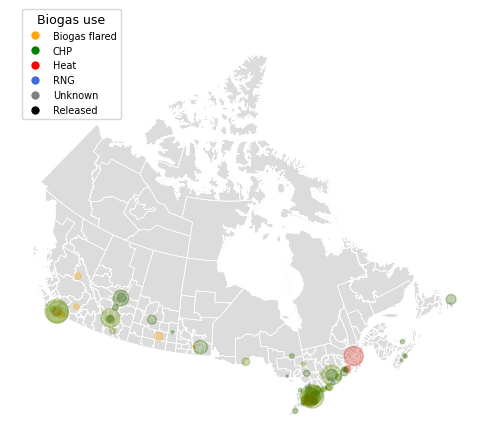

In [165]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))#, sharex=True,)

# We plot the boudaries (the map)
CDs.plot(ax=ax1, color='gainsboro', facecolor="none",
                                        edgecolor='white', linewidth=0.5, linestyle='-',#(0,(1,5)),
                                        zorder=0, alpha=1,aspect='equal')

CDs.plot(ax=ax1, color='none', facecolor="none",
                                        edgecolor='white', linewidth=0.2, linestyle='-',#(0,(1,5)),
                                        zorder=1, alpha=1,aspect='equal')

# map1 = 
WRRF_AD_gdf.plot(ax=ax1,
                  column='Biogas use',
                  marker='o',
                  # cmap =colors.LinearSegmentedColormap.from_list('mylist', ['red', 'royalblue', 'green'], N=3),#
                  cmap =colors.LinearSegmentedColormap.from_list('mylist', ['orange', 'green',
                                                                           'red','royalblue'], N=256),#categories in legends produced by geopandas are sorted
                  # c='LEVEL',
                  # color=['red','yellow','green'],
                 # cmap = cmap,
                 # vmin=vmin,
                 # vmax=vmax,
                 # edgecolor='black',#'darkgrey', 
                 # linewidth=0.4, linestyle=(0,(1,5)),
                  markersize=WRRF_AD_gdf['WWTP real']/2000,#5,
                  # facecolor="None",
                  alpha=0.3,
                  # label=WWWTPs_geodf_USA_wCountiesContiguous_wEconomics.LEVEL,
                 legend=False,
                 # legend_kwds={'label': "Capital cost (P removal) (2020 USD)",}, #'orientation': "horizontal"
                 categorical=True,
                 zorder=3,
                 # legend_kwds={'fontsize':7,'markerscale': 0.5, 'loc': 'lower left'},#'loc': 'center left', 'bbox_to_anchor':(1,0.5)}
                 # norm=colors.Normalize(vmin=vmin, vmax=vmax), #,LogNorm
                 # cax=cax,
                # missing_kwds={'color': 'lightgrey'},
                  aspect='equal',
                )

# ax1.set_ylim(bottom=0.27E7, top=1.15E7)
# ax1.set_xlim(-1.9E7, -0.56E7) #-0.56E7
# ax1.set_ylim(bottom=0.5E7, top=0.87E7)
# ax1.set_xlim(-1.6E7, -0.6E7) #-0.56E7

ax1.axis('off')

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
legend_elements = [
                    Line2D([0], [0], marker='o', color='w', label='Biogas flared',
                          markerfacecolor='orange', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='CHP',
                          markerfacecolor='green', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='Heat',
                          markerfacecolor='red', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='RNG',
                          markerfacecolor='royalblue', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='Unknown',
                          markerfacecolor='grey', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='Released',
                          markerfacecolor='black', markersize=7),
                    ]

ax1.legend(handles=legend_elements, bbox_to_anchor=(0.015, 0.78), loc='lower left', fontsize=7, ncol=1,
                     title="Biogas use", title_fontsize=9)

plt.savefig('Plots/WWTPs_AD_CDs.png', bbox_inches='tight', dpi=600)

## Another example

In [161]:
PRs = gpd.read_file("GIS_files/ProvincesCANADA/lpr_000b16a_e.shp")
PRs = PRs.set_geometry('geometry').to_crs('epsg:3347')#3857
PRs

,PRUID,PRNAME,PRENAME,PRFNAME,PREABBR,PRFABBR,geometry
0,10,Newfoundland and Labrador / Terre-Neuve-et-Lab...,Newfoundland and Labrador,Terre-Neuve-et-Labrador,N.L.,T.-N.-L.,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,11,Prince Edward Island / Île-du-Prince-Édouard,Prince Edward Island,Île-du-Prince-Édouard,P.E.I.,Î.-P.-É.,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,12,Nova Scotia / Nouvelle-Écosse,Nova Scotia,Nouvelle-Écosse,N.S.,N.-É.,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,13,New Brunswick / Nouveau-Brunswick,New Brunswick,Nouveau-Brunswick,N.B.,N.-B.,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,24,Quebec / Québec,Quebec,Québec,Que.,Qc,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,35,Ontario,Ontario,Ontario,Ont.,Ont.,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,46,Manitoba,Manitoba,Manitoba,Man.,Man.,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,47,Saskatchewan,Saskatchewan,Saskatchewan,Sask.,Sask.,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,48,Alberta,Alberta,Alberta,Alta.,Alb.,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,59,British Columbia / Colombie-Britannique,British Columbia,Colombie-Britannique,B.C.,C.-B.,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


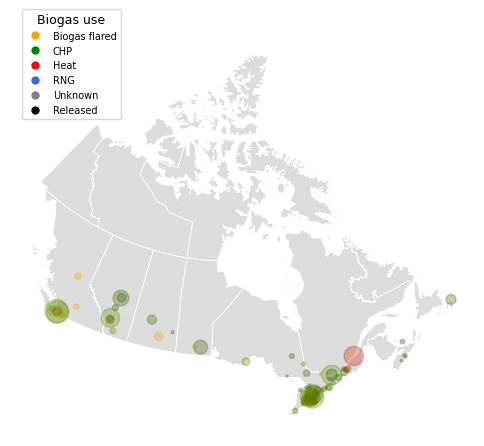

In [164]:
fig, ax1 = plt.subplots(1, 1, figsize=(6,6))#, sharex=True,)

# We plot the boudaries (the map)
PRs.plot(ax=ax1, color='gainsboro', facecolor="none",
                                        edgecolor='white', linewidth=0.5, linestyle='-',#(0,(1,5)),
                                        zorder=0, alpha=1,aspect='equal')

PRs.plot(ax=ax1, color='none', facecolor="none",
                                        edgecolor='white', linewidth=0.2, linestyle='-',#(0,(1,5)),
                                        zorder=1, alpha=1,aspect='equal')

# map1 = 
WRRF_AD_gdf.plot(ax=ax1,
                  column='Biogas use',
                  marker='o',
                  # cmap =colors.LinearSegmentedColormap.from_list('mylist', ['red', 'royalblue', 'green'], N=3),#
                  cmap =colors.LinearSegmentedColormap.from_list('mylist', ['orange', 'green',
                                                                           'red','royalblue'], N=256),#categories in legends produced by geopandas are sorted
                  # c='LEVEL',
                  # color=['red','yellow','green'],
                 # cmap = cmap,
                 # vmin=vmin,
                 # vmax=vmax,
                 # edgecolor='black',#'darkgrey', 
                 # linewidth=0.4, linestyle=(0,(1,5)),
                  markersize=WRRF_AD_gdf['WWTP real']/2000,#5,
                  # facecolor="None",
                  alpha=0.3,
                  # label=WWWTPs_geodf_USA_wCountiesContiguous_wEconomics.LEVEL,
                 legend=False,
                 # legend_kwds={'label': "Capital cost (P removal) (2020 USD)",}, #'orientation': "horizontal"
                 categorical=True,
                 zorder=3,
                 # legend_kwds={'fontsize':7,'markerscale': 0.5, 'loc': 'lower left'},#'loc': 'center left', 'bbox_to_anchor':(1,0.5)}
                 # norm=colors.Normalize(vmin=vmin, vmax=vmax), #,LogNorm
                 # cax=cax,
                # missing_kwds={'color': 'lightgrey'},
                  aspect='equal',
                )

# ax1.set_ylim(bottom=0.27E7, top=1.15E7)
# ax1.set_xlim(-1.9E7, -0.56E7) #-0.56E7
# ax1.set_ylim(bottom=0.5E7, top=0.87E7)
# ax1.set_xlim(-1.6E7, -0.6E7) #-0.56E7

ax1.axis('off')

params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
legend_elements = [
                    Line2D([0], [0], marker='o', color='w', label='Biogas flared',
                          markerfacecolor='orange', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='CHP',
                          markerfacecolor='green', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='Heat',
                          markerfacecolor='red', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='RNG',
                          markerfacecolor='royalblue', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='Unknown',
                          markerfacecolor='grey', markersize=7),
                    Line2D([0], [0], marker='o', color='w', label='Released',
                          markerfacecolor='black', markersize=7),
                    ]

ax1.legend(handles=legend_elements, bbox_to_anchor=(0.015, 0.78), loc='lower left', fontsize=7, ncol=1,
                     title="Biogas use", title_fontsize=9)

plt.savefig('Plots/WWTPs_AD.png', bbox_inches='tight', dpi=600)